## FNCE30012: Foundations of Fintech - Assignment 4
This assignment builds on Lectures 7 to 9 and on Tutorials 6 and 7. You might want to consider using some of the Python code discussed in those lectures and tutorials to answer some of the questions below.

**Important:** It is important that you *do not* change the type (markdwon vs. code) of any cell, *nor* copy/paste/duplicate any cell! If the cell type is markdown, you are supposed to write text, not code, and vice versa. Provide your answer to each question in the allocated cell. *Do not* create additional cells. Answers provided in any other cell will **not** be marked. *Do not* rename the assignment files. All files should be left as is in the assignment directory.

### Task
You are given two datasets:
1. A file called `Assignment4-data.csv`, that contains financial news (headlines) and daily returns for Apple (AAPL). Relying on this dataset, your role as a FinTech student is to explore the relationship between financial news and stock returns.  
  
  
2. A file called `AAPL_returns.csv`, that contains the daily returns for Apple (AAPL).

#### Helpful commands
You may find the following commands helpful to complete some of the questions.
1. How to create a new column using data from existing column? Recall that, in Tutorial 7, we worked with a variable called `FSscore`. Suppose we wanted to divide all the values of this variable by `100` and store the outcome in a new column. This can be done in one step. The code `df['FSscore_scaled'] = df['FSscore']/100` creates a new column with the name `FSscore_scaled` and stores the modified values.
  
 
2. How to separate a string variable into a list of strings? The method `split()` splits a string into a list based on a specified separator. The default separator is any white space. However, one can specify the applied separator as an argument. For example, the code `"a,b,c".split(",")` splits the string `"a,b,c"` into the list `[a, b, c]`.  
  

3. You can use string functions such as `split()` on a `Pandas` dataframe column by using the `str` attribute. For example, `df['alphabets'].str.split(",")` returns a series (consider a series as a dataframe with one column) that contains a list obtained by running the split function on each entry in the column named `alphabets`.  
  

4. How to chain multiple string operations in `Pandas`? Note that a string function on a `Pandas` column returns a series. One can then use another string function on this series to chain multiple operations. For example, the cell below first converts the string to upper case and then calls the split function.  
  

5. How to combine two or more data frames? For this purpose, one can use the `concat` function from `Pandas`. To combine the dataframes to match indices you can use the `axis=1` argument. Please see https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html for examples.  
  
  

Please run the following cell to import the required libraries and for string operations example.

In [2]:
## Execute this cell

####################### Package Setup ##########################

# Disable FutureWarning for better aesthetics.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# essential libraries for this assignment
from finml import *
import numpy as np
import pandas as pd
%matplotlib inline

# for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# suppress warnings for deprecated methods from TensorFlow
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

################################################################

# Example of string operations
import pandas as pd
example_data = {'alphabets':['a,b,c', 'd,e,f', 'a,z,x', 'a,s,p']} 
example_df = pd.DataFrame(example_data) 

# Chain two string operations
example_df['alphabets'].str.upper().str.split(",")

0    [A, B, C]
1    [D, E, F]
2    [A, Z, X]
3    [A, S, P]
Name: alphabets, dtype: object

### Data exploration and transformation
The dataset has the following three columns:
1. date: This column contains the date of the observation.  
  
  
2. headlines: This column contains the concatenation of headlines for that date. The headlines are separated by the `<end>` string. For example, if there are three headlines `h1`, `h2`, and `h3` on a given day, the headline cell for that day will be the string `h1<end>h2<end>h3`.  
  
  
3. returns: This column contains the daily returns.

In your assessment, please address the following questions.

### Question 1 (1.5 marks)
Load the dataset in a `Pandas` dataframe and write a Python code that plots the time series of the daily Apple returns (returns on the y-axis and dates on the x-axis). Make sure your plot's axes are appropriately labelled.

**Note:** Please use `df` as the variable name for the dataframe and the `parse_dates` argument to correctly parse the date column.

### Answer 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 2 columns):
date    2769 non-null datetime64[ns]
RET     2769 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.4 KB
None


Text(0.5, 1.0, 'AAPL daily returns')

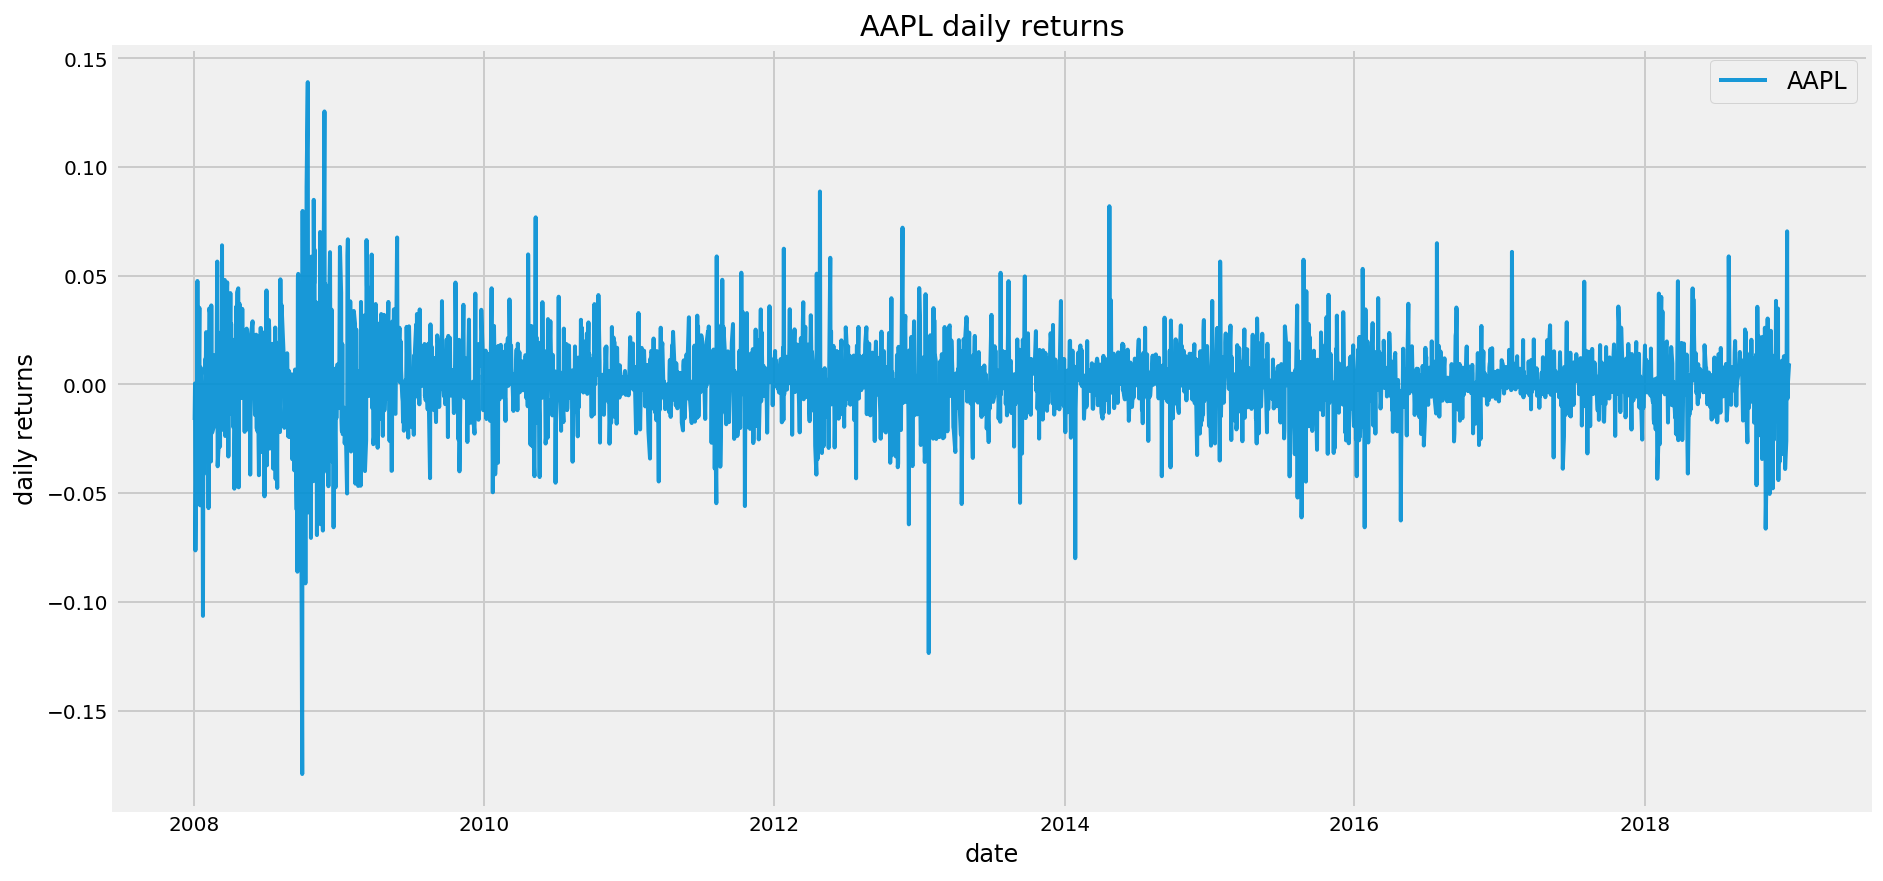

In [3]:
"""Write your code in this cell"""
# YOUR CODE HERE

#required packages
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#to datetime
df = pd.read_csv('AAPL_returns.csv', parse_dates=True)
df['date']= pd.to_datetime(df['date'])

#check info
print(df.info())

#change index
df = df.set_index('date')

plt.figure(figsize=(14 , 7))
plt.plot(df.index, df['RET'], lw=2, alpha=0.9, label="AAPL")
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.xlabel('date')
plt.title("AAPL daily returns")



### Question 2 (1.5 marks)
Write a Python code that plots the time series of daily headline frequencies (the number of headlines per day on the y-axis and the corresponding date on the x-axis). Make sure your plot's axes are appropriately labelled.

### Answer 2

Text(0.5, 1.0, 'Time Series of number of headlines per day')

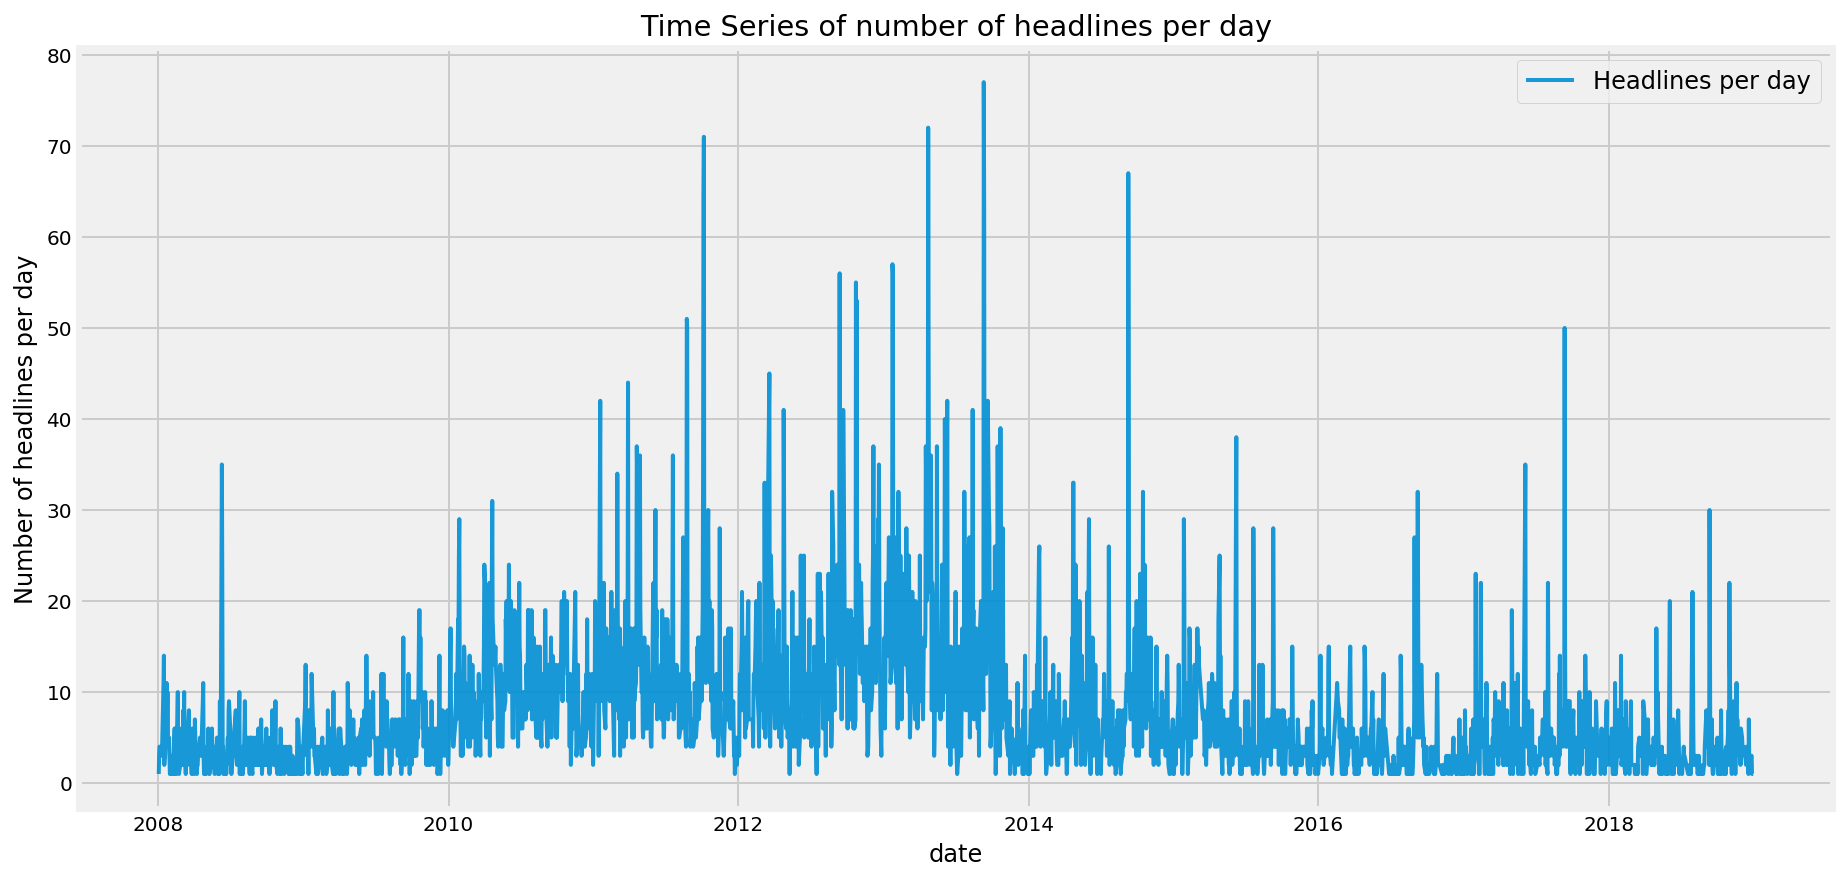

In [4]:
"""Write your code in this cell"""
# YOUR CODE HERE

#required packages
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#read data
df = pd.read_csv('Assignment4-data.csv', parse_dates=True)
df['headlines']

#organise data
df['splitted'] = df['headlines'].str.split("<end>")
df['count'] = df['splitted'].str.len()

#to datetime and make date as index
df['date']= pd.to_datetime(df['date'])
df = df.set_index('date')

#plot
plt.figure(figsize=(14 , 7))
plt.plot(df.index, df['count'], lw=2, alpha=0.9, label="Headlines per day")
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Number of headlines per day')
plt.xlabel('date')
plt.title("Time Series of number of headlines per day")


### Question 3 (2 marks)
We will use neural networks to explore the relationship between the content of financial news and the direction of stock returns, i.e., their classification into positive or negative returns.

1. Create a new column called `returns_direction` in the dataframe that classifies daily returns based on their direction: it assigns a given return a value of 1, if the return is positive (i.e, greater than 0), and a value of 0 otherwise. You may find the Numpy function `where()` useful for this question.

2. Count the number of days on which the stock had positive and non-positive returns, respectively.

### Answer 3

In [5]:
"""Write your code in this cell"""

#conditional
df['returns_direction'] = np.where(df['returns'] > 0, 1, 0)

#printing the required outputs
print('number of days with positive returns =', df['returns_direction'].sum())
print('number of days with negative returns =', len(df['returns_direction'])-df['returns_direction'].sum())


number of days with positive returns = 1349
number of days with negative returns = 1221


### Question 4 (3 marks)
For this question please restrict your computations to the first 100 headline dates. You can select them by using the `head` function of `Pandas`. Calculate the tf-idf metric for the following word and headline(s) pairs:
1. Word "apple" in headlines with date 2008-01-07. Store this value in a variable called `aaple_tfidf`.
2. Word "samsung" in headlines with date 2008-01-17. Store this value in a variable called `samsung_tfidf`.
3. Word "market" for news headlines with dates 2008-03-06. Store this value in a variable called `market_tfidf`.

Please write a Python code that calculates the metrics from the `df` dataframe.

### Answer 4

In [6]:
"""Write your code in this cell"""
# code insipired by tutorial 7
# subsetting into top 100 only
top100 = df.head(100)

top100headline = top100['headlines']

# a loop that separates (or splits) each word in the top100headline from one another, creating a list of all words
document_words = [doc.split() for doc in top100headline]

# turn our list into a sorted array (alphabetical order) which is a set (i.e. no duplicate words)
vocab = sorted(set(sum(document_words, [])))

# create a dictionary that takes each word as a key and their alphabetical order as a value
vocab_dict = {k: i + 1 for i, k in enumerate(vocab)}
print('All words:\n', vocab, "\n")
print('Position of all the words:\n', vocab_dict, "\n")

X_tf = np.zeros((len(top100headline), len(vocab)), dtype=int)

# for each word in our list of words
for i, doc in enumerate(document_words):
    for word in doc:
        # record the count of that word in its array
        X_tf[i, vocab_dict[word] - 1] += 1
print('X_tf = ') 
print(X_tf)  

idf = np.log(X_tf.shape[0]/X_tf.astype(bool).sum(axis=0))
print('idf = ')
print(idf)

X_tfidf = X_tf * idf
print('X_tfidf = ')
print(X_tfidf)

apple_tfidf = X_tfidf[top100.index.get_loc('2008-01-07')][vocab_dict['apple']-1]
samsung_tfidf = X_tfidf[top100.index.get_loc('2008-01-07')][vocab_dict['samsung']-1]
market_tfidf = X_tfidf[top100.index.get_loc('2008-03-06')][vocab_dict['market']-1]

# printing the variables

print('apple_tfidf =', apple_tfidf)
print('samsung_tfidf =', samsung_tfidf)
print('market_tfidf =', market_tfidf)

All words:
 ['$1', '$1.14', '$1.16', '$1.76', '$100', '$100m', '$14.6m', '$1b', '$229', '$25m', '$278m', '$3.2m', '$41m', '$499', '$550;000', '$69', '$75m', '&amp;', '&amp;gt;aapl', '&amp;gt;adbe', '&amp;gt;bidu', '&amp;gt;dell', '&amp;gt;msft', '&amp;lt;mot', '&quot;remade&quot;', '&quot;share', "'09", "'digital", "'game-changer'", "'hobby'", "'not", "'push'", "'strategy'", "'unlock'", "'where's", '+2.7%', '+49%;', '-', '-0.2%', '-gartner', '-investor', '-report', '-reuters', '-sfsu', '-source', '-sources', '...', '0730', '08', '1', '1.3', '10', '10%', '100;000', '10;000', '10m', '11', '11%', '12', '15', '16gb', '1;000', '1h', '1m-share', '1q', '2-gb', '2.0', '2007', '2007;', '2008', '22', '22%', '22%;', '23', '25%', '250;000', '28', '28%', '29%', '2h', '2nd', '2q', '3', '3.1', '30%', '32gb', '36%', '36%;', '3g', '3q', '3q;', '3rd', '4', '4.5g', '42%', '4g', '4q', '4th', '5', '58%;', '5th', '6.2%;', '6m', '70;000', '8', '87c', '9.5%', '90;000', '92%', '<end>', '=dj', '=wsj', '=wsj:', 

### Question 5 (3 marks)
Build and train a **one**-layer neural network with two units (neurons) to explain return directions based on financial news. Report and interpret the following three performance measures: "Precision", "Recall", and "Accuracy". According to your opinion, which performance measure(s) is (are) most important in the context of linking news headlines to stock returns and why?

### Answer 5 - Code

In [7]:
#code insipired by tutorial 7

# defining the input and output variables 
X_texts = df["headlines"].values
y = df["returns_direction"].values

# splitting the train and test set
data = split_by_threshold(X_texts, y, test_size=0.2,)
(train_texts, y_train, test_texts, y_test) = data

# quantify the text data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)
data = (X_train, y_train, X_test, y_test)

# building the model 
model = build_model(X_train.shape[1:], layers=1, units=2);
model.summary()
model = train_model(data, model,);

# evaluate the model
evaluate(model, data)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 40002     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 40,005
Trainable params: 40,005
Non-trainable params: 0
_________________________________________________________________
Train on 2056 samples, validate on 514 samples
Epoch 1/1000
2056/2056 - 1s - loss: 0.6930 - acc: 0.5195 - val_loss: 0.6931 - val_acc: 0.5272
Epoch 2/1000
2056/2056 - 1s - loss: 0.6925 - acc: 0.5243 - val_loss: 0.6930 - val_acc: 0.5272
Epoch 3/1000
2056/2056 - 1s - loss: 0.6919 - acc: 0.5243 - val_loss: 0.6929 - val_acc: 0.5272
Epoch 4/1000
2056/2056 - 1s - loss: 0.6912 - acc: 0.5243 - val_loss: 0.6928 - val_acc: 0.5272
Epoch 5/1000
2056/2056 - 1s - loss: 0.6905 - acc: 0.5243 - val_loss: 0.6927 - val_acc: 0.52

Epoch 81/1000
2056/2056 - 1s - loss: 0.6168 - acc: 0.7641 - val_loss: 0.6906 - val_acc: 0.5253
Epoch 82/1000
2056/2056 - 1s - loss: 0.6157 - acc: 0.7685 - val_loss: 0.6906 - val_acc: 0.5233
Epoch 83/1000
2056/2056 - 1s - loss: 0.6146 - acc: 0.7719 - val_loss: 0.6906 - val_acc: 0.5233
Epoch 84/1000
2056/2056 - 1s - loss: 0.6135 - acc: 0.7729 - val_loss: 0.6906 - val_acc: 0.5233
Epoch 85/1000
2056/2056 - 1s - loss: 0.6123 - acc: 0.7763 - val_loss: 0.6906 - val_acc: 0.5233
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.5263157894736842
Recall:  0.959409594095941
Accuracy Score:  0.5233463035019456

########################################
############## Train Set: ##############
########################################
Precision:  0.7066929133858267
Recall:  0.9990723562152134
Accuracy Score:  0.7821011673151751


### Answer 5 - Text

Returns, either negative or positive, are both important regarding the direction in the context of associating news headlines to stock returns. Therefore, accuracy is the most important measure as this measure takes into account both results with the same weight. Recall is defined as the proportion of correct predictions of positive returns out of the whole actual positive returns (highlighting false negatives) and precision is the proportion of correct predictions of positive returns out of all predicted positive returns by the model (highlighting false positives). These 2 measures clearly show how they weigh only positive returns. Hence, accuracy is the proper preformance measure.




### Question 6 (3 marks)
Explore different neural network models by changing the number of layers and units. You can use up to three layers and five units. 

Complete the table below by adding your results for the **test** data set. You should duplicate the table format in your own markdown cell and replace the "-" placeholders with the corresponding values. Discuss your findings for both the test and train data sets.

| Num. Layers  | Num. Units           | Precision  | Recall | Accuracy |
| --------- |:---------:| -----:| -----:| -----:|
| 1 | 1 | - | - | - |
| 2 | 3 | - | - | - |
| 3 | 5 | - | - | - |

### Answer 6 - Code

In [8]:
"""Write your code in this cell"""

# defineX and Y
X_texts = df["headlines"].values
y = df["returns_direction"].values

# train/test split
data = split_by_threshold(X_texts, y, test_size=0.2,)
(train_texts, y_train, test_texts, y_test) = data

# quantify text data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)

data = (X_train, y_train, X_test, y_test)

# change the hidden layers and units
model = build_model(X_train.shape[1:], layers=1, units=3);
model.summary()
model = train_model(data, model,);

# evaluate the model 
evaluate(model, data)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 60003     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 60,007
Trainable params: 60,007
Non-trainable params: 0
_________________________________________________________________
Train on 2056 samples, validate on 514 samples
Epoch 1/1000
2056/2056 - 1s - loss: 0.6930 - acc: 0.5282 - val_loss: 0.6930 - val_acc: 0.5272
Epoch 2/1000
2056/2056 - 1s - loss: 0.6925 - acc: 0.5243 - val_loss: 0.6930 - val_acc: 0.5272
Epoch 3/1000
2056/2056 - 1s - loss: 0.6919 - acc: 0.5243 - val_loss: 0.6929 - val_acc: 0.5272
Epoch 4/1000
2056/2056 - 1s - loss: 0.6912 - acc: 0.5243 - val_loss: 0.6928 - val_acc: 0.5272
Epoch 5/1000
2056/2056 - 1s - loss: 0.6905 - acc: 0.5243 - val_loss: 0.6927 - val_acc: 0.52

### Answer 6 - Text


| Num. Layers  | Num. Units           | Precision  | Recall | Accuracy |
| --------- |:---------:| -----:| -----:| -----:|
| 1 | 1 | 0.5319 | 0.9225 | 0.5311 |
| 1 | 2 | 0.5263 | 0.9594 | 0.5233 |
| 1 | 3 | 0.5271 | 0.9705 | 0.5253 |
| 2 | 2 | 0.5571 | 0.5941 | 0.5370 |
| 2 | 3 | 0.5896 | 0.5830 | 0.5661 |
| 3 | 3 | 0.5816 | 0.4207 | 0.5350 |
| 3 | 5 | 0.5225 | 0.8155 | 0.5097 |



When the number of hidden layer is 1, the highest accuracy for both train and test set is when unit is equal to 1. Yet, the highest recall in the set is when unit is 3 at 0.9705, suggesting a high proportion of actual positives returns are predicted correctly (however, precision and accuracy is around 0.5. Therefore, this suggests that the model predicts a lot of positive returns compared to negative returns). The train accuracy improves significantly when hidden layer is changed to 2 and unit to 2 (from 0.8852 to 0.9859). However, test accuracy increaases only marginally (from 0.5311 to 0.5370). The addition of another unit (3 units) results in a relatively high train accuracy and the highest test accuracy in this set (0.9922 train accuracy and 0.5661 test accuracy). 3 hidden layers and 3 units produces the highest train accuracy at 0.9931, but lower test accuracy than before at 0.5350. The most complex model with 3 hidden layers and 5 units generates a model with the lowest test accuracy in this set at 0.5097 with a train accuracy of 0.7840.

The more complex combination usually leads to a better fit only for the train set while slightly improves on test set performance, yet this is only true before the model gets too complex as shown by the complex model with 3 hidden layers and 5 units. It is hard to predict the best numbers of hidden layers and/or units for the best performance on the test set. There is also no formula, but trial of different combinations can give good estimates. In this question, 2 hidden layers and 3 units seem to give the highest test accuracy at 0.5661.

### Question 7 (3 marks)
Explore the effects of different splits between the training and testing data on the performance of a given neural network model. 

Complete the table below by adding your results. You should duplicate the table format in your own markdown cell and replace the "-" placeholders with the corresponding values. Discuss your findings.

Complete the table below by adding your results for the **test** data set. You should use the same markdown format and simply replace the "-" placeholders with the corresponding values. Discuss your findings for the different test and train data sets.

| Num. Layers/Num. Units| Train/Test split | Precision  | Recall | Accuracy |
| --------- |:---------:| -----:| -----:| -----:|
| 2/3 | 90/10 | - |- |- |
| 3/5 | 90/10 | - |- |- |
| 2/3 | 60/40 | - |- |- |
| 3/5 | 60/40 | - |- |- |

### Answer 7 - Code

In [9]:

# define X and Y
X_texts = df["headlines"].values
y = df["returns_direction"].values

# changing the train/test split
data = split_by_threshold(X_texts, y, test_size=0.4,)
(train_texts, y_train, test_texts, y_test) = data

# quantify text data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)

data = (X_train, y_train, X_test, y_test)

# build the model
model = build_model(X_train.shape[1:], layers=3, units=5);
model.summary()
model = train_model(data, model,);

# evaluate the model 
evaluate(model, data)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 100005    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 100,071
Trainable params: 100,071
Non-trainable params: 0
_________________________________________________________________
Train on 1542 samples, validate on 1028 samples
Epoch 1/1000
1542/1542 - 1s - loss: 0.6932 - acc: 0.4734 - val_loss: 0.6932 - val_acc: 0.5039
Epoch 2/1000
1542/1542 - 1s - loss: 0.6930 - acc: 0.5720 - val_loss: 0.6931 - val_acc: 0.5019
Epoch 3/1000

### Answer 7 - Text


| Num. Layers/Num. Units| Train/Test split | Precision  | Recall | Accuracy |
| --------- |:---------:| -----:| -----:| -----:|
| 2/3 | 90/10 |0.5175 |1.0 |0.5175 |
| 3/5 | 90/10 |0.4898 |0.7218 |0.4669 |
| 2/3 | 60/40 |0.5224 |1.0 |0.5224 |
| 3/5 | 60/40 |0.5257 |0.6667 |0.5117 |


For 2/3 layers-units, changing from 90/10 to 60/40 Train/Test split improves all performance measures except for recall as it is 1 for both train and test measures in both Train/Test split. This conveys that precision is equal to accuracy by definition as there is no false negatives. The improvement in both precision and accuracy is only by 0.001 in the train set and 0.004 in the test set. This small improvement conveys that for 2/3 layers-units, the model is pretty stable regarding the Train/Test split.

For 3/5 layers-units, the increase in performance measures changing from 90/10 to 60/40 Train/Test split is most apparent from the train set performance. This is followed by a slight increase from the precision (0.49 to 0.53) and accuracy (0.47 to 0.51) of the test set. In contrast to the other measures, racall decreases from 0.72 to 0.67. This states that there is more false negatives in the 60/40 Train/Test on the test set. 

The results seem somewhat unintuitive as I would have predicted the train set performance measures would increase the higher the proportion of the train set. However, the results do not show that. The higher proportion of train set reduces the performance measures of the train set. However, the split between train and test can also be biased as the proportion of positives or negatives distribution can be skewed. This is also evidenced by recall of 1, but accuracy/precision of only about 0.5. This highlights that most predictions are for positive returns as there is no false negatives. It is really important to make sure that the split is randomised and not favoring any direction of the returns. Improvements of test set are all from decreasing the proportion of the train set from the split. This is is because the lower proportion would reduce the risk of an overfit.



### Question 8 (3 marks)
Run a logistic regression with the same independent and dependent variables as used for the above neural network models. You have access to the `sklearn` package, which should help you answering this question. To work with the `sklearn` package, you may find the following links helpful.
1. Building a logit model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
  
  
2. Evaluating a logit model: 
    - Recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
    - Precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
    - Accuracy: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    
Compare and contrast your findings with the above findings based on neural network models.

### Answer 8 - Code

In [13]:
"""Write your code in this cell"""
from sklearn.metrics import accuracy_score


# define X and Y
X_texts = df["headlines"].values
y = df["returns_direction"].values

# split data into train and test set
data = split_by_threshold(X_texts, y, test_size=0.2,)
(train_texts, y_train, test_texts, y_test) = data

# quantify text data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)

# provide data split
data = (X_train, y_train, X_test, y_test)

# fit the model with train set
clf = LogisticRegression().fit(X_train, y_train)
      
# predict y test
y_pred = clf.predict(X_test)

# evaluate the model
print('accuracy (1st method) = ',clf.score(X_test, y_test))

print('accuracy (2nd method) = ',accuracy_score(y_test, y_pred))

print('recall = ',recall_score(y_test, y_pred))
      
print('precision = ',precision_score(y_test, y_pred))
      

accuracy (1st method) =  0.519455252918288
accuracy (2nd method) =  0.519455252918288
recall =  0.5645756457564576
precision =  0.5425531914893617


### Answer 8 - Text

Unlike models by artificial neural network (ANN), there is not much that can be tweaked in the logit model. There is no hidden layers or units. A logit model is similar to an ANN with 1 hidden layer and 1 unit. Both models are also similar as they can both be utilised to build a model of classification (binary or multi modal). 

By comparing this logit model to the 1 hidden layer and 1 unit model of the ANN, we can find that both accuracy and precision are similar, ranging from 0.52 to 0.54. The major difference is the recall, in which ANN's value is 0.9225. This is really high compared to that of the logit model, 0,5646. The reason would be because there is much less false negatives in the ANN model, but more more false positives as shown by the low accuracy and precision. This suggests that the ANN model predicts positive returns (or 1 in binary) more than negative returns (or 0 in binary). This is not true for the logit model as shown by the all the performance measures just slightly above 50%, a bit more than the probability getting a head from a flip of a fair coin.

One advandtage from a logit model is the small risk of overfitting as this can happen easily in ANN only by changing the number of hidden layers and units as proved by a model with 3 hidden layers and 5 units on question 6.




### Question 9 (5 marks)
Everything you did so far was explaining stock returns with contemporaneous financial news that were released on the same date. To explore how well a neural network can **predict** the direction of **future** returns based on our text data, you should do the following.
1. Please read the `AAPL_returns.csv` into a dataframe by using the `parse_dates` argument and create a new column  `returns_pred` by shifting the returns by one **trading** day. For this purpose, you may find the `shift` function from `Pandas` helpful.
  
  
2. Combine the `df` dataframe that contains headlines with this new dataframe such that for a given headline date, the value in `returns_pred` contains the return on the **subsequent** trading day.
  
  
3. Train a neural network that uses financial news to learn the `returns_pred` variable. You are allowed to use any of the above neural network parameterisations and train/test data splits.
  
  
4. Explain your findings with regard to the given data and your chosen parameters. Interpret your results in the context of the Efficient Market Hypothesis (EMH).

### Answer 9 - Code

In [12]:
"""Write your code in this cell"""

# read AAPL_returns.csv
AAPLreturns = pd.read_csv('AAPL_returns.csv', parse_dates=['date'])

# set date as index
AAPLreturns['date']= pd.to_datetime(AAPLreturns['date'])
AAPLreturns = AAPLreturns.set_index('date')

# create new feature "returns_pred" by shifting 'RET' backwards by 1 day
AAPLreturns['returns_pred']=AAPLreturns['RET'].shift(-1, axis=0)

# add "headline" feature to this new dataframe
AAPLreturns['headlines']=df["headlines"]

# create "returns_pred_direction" feature as 1 if return on the following day is positive and 0 otherwise
AAPLreturns['returns_pred_direction'] = np.where(AAPLreturns['returns_pred'] > 0, 1, 0)

# to check allignment and number of NAs
print(AAPLreturns.head(50))
print(AAPLreturns.isna().sum())

# drop NAs
AAPLreturns = AAPLreturns.dropna(how='any')

# check number of NAs
print(AAPLreturns.isna().sum())

# assign X and Y to build model
X_texts = AAPLreturns["headlines"].values
y = AAPLreturns["returns_pred_direction"].values

# train/test split for data
data = split_by_threshold(X_texts, y, test_size=0.2,)
(train_texts, y_train, test_texts, y_test) = data

# quantify text data
(X_train, X_test, vectorizer, k_best_selector) = ngram_vectorize(data,)

# provide data split
data = (X_train, y_train, X_test, y_test)

# build model with 2 hidden layers and 3 units
model = build_model(X_train.shape[1:], layers=2, units=3);
model.summary()
model = train_model(data, model,);

# evaluate the model
evaluate(model, data)

                 RET  returns_pred  \
date                                 
2008-01-02 -0.016357      0.000462   
2008-01-03  0.000462     -0.076335   
2008-01-04 -0.076335     -0.013385   
2008-01-07 -0.013385     -0.035972   
2008-01-08 -0.035972      0.047591   
2008-01-09  0.047591     -0.007692   
2008-01-10 -0.007692     -0.029940   
2008-01-11 -0.029940      0.035265   
2008-01-14  0.035265     -0.054480   
2008-01-15 -0.054480     -0.055608   
2008-01-16 -0.055608      0.007830   
2008-01-17  0.007830      0.002921   
2008-01-18  0.002921     -0.035449   
2008-01-22 -0.035449     -0.106451   
2008-01-23 -0.106451     -0.024965   
2008-01-24 -0.024965     -0.041224   
2008-01-25 -0.041224      0.000000   
2008-01-28  0.000000      0.011768   
2008-01-29  0.011768      0.004865   
2008-01-30  0.004865      0.024058   
2008-01-31  0.024058     -0.011894   
2008-02-01 -0.011894     -0.015701   
2008-02-04 -0.015701     -0.017395   
2008-02-05 -0.017395     -0.056895   
2008-02-06 -

Epoch 1/1000
2055/2055 - 1s - loss: 0.6932 - acc: 0.4740 - val_loss: 0.6931 - val_acc: 0.5292
Epoch 2/1000
2055/2055 - 1s - loss: 0.6931 - acc: 0.5231 - val_loss: 0.6931 - val_acc: 0.5272
Epoch 3/1000
2055/2055 - 1s - loss: 0.6930 - acc: 0.5236 - val_loss: 0.6930 - val_acc: 0.5272
Epoch 4/1000
2055/2055 - 1s - loss: 0.6928 - acc: 0.5236 - val_loss: 0.6930 - val_acc: 0.5272
Epoch 5/1000
2055/2055 - 1s - loss: 0.6927 - acc: 0.5236 - val_loss: 0.6929 - val_acc: 0.5272
Epoch 6/1000
2055/2055 - 1s - loss: 0.6924 - acc: 0.5236 - val_loss: 0.6929 - val_acc: 0.5272
Epoch 7/1000
2055/2055 - 1s - loss: 0.6922 - acc: 0.5236 - val_loss: 0.6929 - val_acc: 0.5272
Epoch 8/1000
2055/2055 - 1s - loss: 0.6919 - acc: 0.5236 - val_loss: 0.6928 - val_acc: 0.5272
Epoch 9/1000
2055/2055 - 1s - loss: 0.6916 - acc: 0.5236 - val_loss: 0.6928 - val_acc: 0.5272
Epoch 10/1000
2055/2055 - 1s - loss: 0.6913 - acc: 0.5236 - val_loss: 0.6928 - val_acc: 0.5272
Epoch 11/1000
2055/2055 - 1s - loss: 0.6910 - acc: 0.5236 -

### Answer 9 - Text

Test Set: 

Precision:  0.5272373540856031

Recall:  1.0

Accuracy Score:  0.5272373540856031

Train Set: 

Precision:  0.5236009732360097

Recall:  1.0

Accuracy Score:  0.5236009732360097

For this question, I built an artificial neural network model with 80/20 train test split, 2 hidden layers, and 3 units. Input is the headlines on the day that has been processed to make it quantifiable and output is a binary (0 or 1) that would show the direction of the return on the next day. This model would try to test the semi-strong form of the efficient market hypothesis (EMH) stating that prices contain all publicly available information (including headlines).

Recall is 1 for both train and test set. This suggests that there is no false negatives in the predicted returns. This is odd as both accuracy and precision are low for both the train and test set. The underlying reason would be that the model predicts more positive returns than negative returns so that false positives are inflated.

Accuracy and precision of both train and test set are just a bit better than the probablity of flipping a head from a fair coin toss, meaning that the model is not good at predicting the next day return by looking at the day's headlines. This is in line with the semi-strong form of efficient market hypothesis, in which it states that prices of securities already include information that is public (that would be used to determine the return) as stated earlier. Technical and fundamental analysis would not lead to a better predictive model. Hence, accuracy is only about 50%. This shows consistency with the semi-strong form of the efficient market hypothesis.
